In [1]:
import numpy as np
import pandas as pd
from sklearn import tree


In [2]:
df  =  pd.read_csv('DecisionTreesClassificationDataSet.csv')


In [3]:
df.head()

,Deneyim Yili,SuanCalisiyor?,Eski Calistigi Firmalar,Egitim Seviyesi,Top10 Universite?,StajBizdeYaptimi?,IseAlindi
0,11,Y,4,BS,N,N,Y
1,0,N,0,PhD,Y,Y,Y
2,5,Y,2,MS,N,Y,Y
3,3,N,1,BS,N,Y,Y
4,0,N,0,BS,N,N,N


In [4]:
# butun verileri sayisal degerlere degistirildi

duzeltme_mapping = {'Y':1,'N':0}
duzeltme_mapping_egitim = { 'BS':0, 'MS':1, 'PhD':2 }
df['IseAlindi'] = df['IseAlindi'].map(duzeltme_mapping)
df['SuanCalisiyor?']  = df['SuanCalisiyor?'].map(duzeltme_mapping)
df['Top10 Universite?'] =  df['Top10 Universite?'].map(duzeltme_mapping)
df['StajBizdeYaptimi?']  = df['StajBizdeYaptimi?'].map(duzeltme_mapping)
df['Egitim Seviyesi'] = df['Egitim Seviyesi'].map(duzeltme_mapping_egitim)
df.head()

,Deneyim Yili,SuanCalisiyor?,Eski Calistigi Firmalar,Egitim Seviyesi,Top10 Universite?,StajBizdeYaptimi?,IseAlindi
0,11,1,4,0,0,0,1
1,0,0,0,2,1,1,1
2,5,1,2,1,0,1,1
3,3,0,1,0,0,1,1
4,0,0,0,0,0,0,0


In [5]:
y = df['IseAlindi']
X = df.drop(['IseAlindi'], axis=1)

In [6]:
# decision tree olusturma
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)


[Text(239.14285714285714, 195.696, 'X[5] <= 0.5\ngini = 0.469\nsamples = 16\nvalue = [6, 10]'),
 Text(191.31428571428572, 152.208, 'X[1] <= 0.5\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(143.4857142857143, 108.72, 'X[0] <= 0.5\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(95.65714285714286, 65.232, 'X[4] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(47.82857142857143, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(143.4857142857143, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(191.31428571428572, 65.232, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(239.14285714285714, 108.72, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(286.9714285714286, 152.208, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]')]

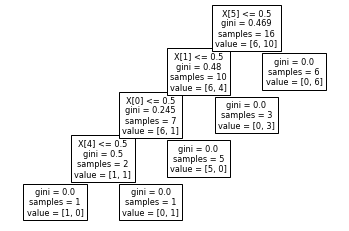

In [7]:
tree.plot_tree(clf)

In [10]:
# prediction; 5 yil deneyimli bir  yerde calisan ve 3 sirkettte calismis egitim durumu lisans
print(clf.predict([[5,1,3,0,0,0]]))

[1]


In [11]:
# 2 yil deneyim , calismiyor , iyi okul menzunu
print(clf.predict([[2,0,7,0,1,0]]))

[0]
